# GLCM

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy

In [2]:
print(os.listdir(r"D:\College\Third Year\Computer Vision\cp2\Datasets\Common Dataset"))


['Test', 'Train']


In [3]:
#Start by creating empty lists.
train_images = []
train_labels = [] 

In [4]:
for directory_path in glob.glob(r"D:\College\Third Year\Computer Vision\cp2\Datasets\Common Dataset\Train\*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        #print(img_path)
        img = cv2.imread(img_path, 0) #Reading color images
        img = cv2.resize(img, (300, 300)) #Resize images
        train_images.append(img)
        train_labels.append(label)

Adult
Old
Young


In [5]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [6]:
print(train_images)
print(train_labels)

[[[250 252 251 ... 255 255 255]
  [250 252 253 ... 255 255 255]
  [250 253 254 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 ...

 [[254 255 255 ... 209 205 205]
  [254 255 255 ... 211 207 203]
  [255 255 255 ... 203 202 207]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 198 197 200]
  [255 255 255 ... 204 204 203]
  [255 255 255 ... 200 203 202]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 2

In [7]:
#Do exactly the same for test/validation images
# test
test_images = []
test_labels = []
rgb_test_images = []

In [8]:
for directory_path in glob.glob(r"D:\College\Third Year\Computer Vision\cp2\Datasets\Common Dataset\Test\*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (300, 300))
        test_images.append(img)
        test_labels.append(fruit_label)
        rgb_test_images.append(cv2.imread(img_path))

In [9]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [10]:
print(test_images)
print(test_labels)

[[[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 ...

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 2

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [12]:
print(le.transform(test_labels))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [13]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
#If you only have one dataset then split here
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [14]:
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  #iterate through each file 
        #print(image)
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        img = dataset[image, :,:]
    ################################################################
    #START ADDING DATA TO THE DATAFRAME
  
                
         #Full image
        #GLCM = graycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
        GLCM = graycomatrix(img, [2], [0])       
        GLCM_Energy = graycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = graycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr       
        GLCM_diss = graycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss       
        GLCM_hom = graycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom       
        GLCM_contr = graycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr


        GLCM2 = graycomatrix(img, [3], [0])       
        GLCM_Energy2 = graycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = graycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2       
        GLCM_diss2 = graycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = graycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = graycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2

        GLCM3 = graycomatrix(img, [5], [0])       
        GLCM_Energy3 = graycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = graycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3       
        GLCM_diss3 = graycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3       
        GLCM_hom3 = graycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3       
        GLCM_contr3 = graycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3

        GLCM4 = graycomatrix(img, [3], [np.pi/4])       
        GLCM_Energy4 = graycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = graycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4       
        GLCM_diss4 = graycoprops(GLCM4, 'dissimilarity')[0]
        df['Diss_sim4'] = GLCM_diss4       
        GLCM_hom4 = graycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4       
        GLCM_contr4 = graycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4
        
        GLCM5 = graycomatrix(img, [4], [np.pi/2])       
        GLCM_Energy5 = graycoprops(GLCM5, 'energy')[0]
        df['Energy5'] = GLCM_Energy5
        GLCM_corr5 = graycoprops(GLCM5, 'correlation')[0]
        df['Corr5'] = GLCM_corr5       
        GLCM_diss5 = graycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim5'] = GLCM_diss5       
        GLCM_hom5 = graycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen5'] = GLCM_hom5       
        GLCM_contr5 = graycoprops(GLCM5, 'contrast')[0]
        df['Contrast5'] = GLCM_contr5
        
        
        
        #Add more filters as needed
        entropy = shannon_entropy(img)
        df['Entropy'] = entropy
        
        #print(GLCM_Energy,GLCM_corr,GLCM_diss,GLCM_hom,GLCM_contr,entropy)

        
        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)
        
    return image_dataset

In [15]:
image_features = feature_extractor(x_train)
X_for_ML =image_features


C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\AppDa

In [16]:
X_for_ML

,Energy,Corr,Diss_sim,Homogen,Contrast,Energy2,Corr2,Diss_sim2,Homogen2,Contrast2,...,Corr4,Diss_sim4,Homogen4,Contrast4,Energy5,Corr5,Diss_sim5,Homogen5,Contrast5,Entropy
0,0.628391,0.995703,1.030390,0.772884,11.835563,0.615109,0.876525,6.338025,0.675834,341.519753,...,0.918646,4.686996,0.694200,225.151209,0.622599,0.962483,2.885349,0.708794,103.788705,3.402276
0,0.661296,0.992119,1.276221,0.767727,18.359186,0.646711,0.863801,6.140224,0.695629,318.777845,...,0.906657,4.665004,0.711100,218.671580,0.655844,0.952359,3.020495,0.724870,111.525360,3.127803
0,0.686554,0.992920,1.199855,0.781522,16.968484,0.675854,0.887940,5.491358,0.719399,269.892233,...,0.923302,4.242523,0.732499,184.875084,0.682412,0.960731,2.754944,0.743308,94.594809,2.935692
0,0.688325,0.993866,1.160680,0.783124,14.757826,0.677628,0.889186,5.487026,0.721874,267.941549,...,0.924578,4.261632,0.733291,182.511103,0.684416,0.964914,2.618694,0.746449,84.857140,2.922597
0,0.682248,0.994738,1.098941,0.782531,11.921237,0.667751,0.864823,6.008597,0.711161,307.725275,...,0.908600,4.589399,0.722941,208.197390,0.677608,0.968613,2.535923,0.741615,71.463266,2.956746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.636009,0.990946,1.598807,0.743332,30.617715,0.628142,0.919403,4.693580,0.708500,274.208507,...,0.927941,4.349534,0.709714,244.897144,0.630243,0.960835,3.076318,0.714230,132.943705,3.279810
0,0.623897,0.992871,1.514693,0.737799,24.401918,0.616512,0.924094,4.658631,0.698931,261.289383,...,0.932567,4.303703,0.699625,231.900928,0.618231,0.965400,2.981318,0.705294,118.904966,3.402314
0,0.627577,0.990781,1.653846,0.732018,30.371014,0.616283,0.896823,5.475028,0.689604,341.842458,...,0.915006,4.782803,0.692717,281.270055,0.621018,0.956243,3.260383,0.700503,144.627658,3.390200
0,0.623825,0.991457,1.640323,0.727894,29.182575,0.613419,0.908562,5.394635,0.683480,314.134119,...,0.923787,4.770247,0.686295,261.463752,0.617375,0.960695,3.211847,0.695761,134.704212,3.475244


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import joblib
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [34]:
#Decision Tree Classifier
from sklearn.metrics import accuracy_score
#Assign model with Decision Tree classifier
model_dt = DecisionTreeClassifier(max_depth=13)
model_dt.fit(X_for_ML, y_train)
joblib.dump(model_dt,"model_dt")

#predicting the traget variable using testing variables
y_pred1 = model_dt.predict(test_for_RF)
#Results
print("Decision Tree Results")
print("Decision Tree Accuracy: ",accuracy_score(y_test, y_pred1)*100,"%")
print("Train Accuracy:",model_dt.score(X_for_ML, y_train))
print("Test Accuracy:",model_dt.score(test_for_RF, y_test))
print ("Accuracy = ", metrics.accuracy_score(y_test, y_pred1))
print('Balanced accuracy: ', metrics.balanced_accuracy_score(y_test, y_pred1))
print("Precision Score: ",metrics.precision_score(y_test, y_pred1, average='macro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred1, average='macro')) # true positive rate, Sensitivity
print("F1 Score: ",metrics.f1_score(y_test, y_pred1, average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred1))

Decision Tree Results
Decision Tree Accuracy:  70.43795620437956 %
Train Accuracy: 0.9994623655913979
Test Accuracy: 0.7043795620437956
Accuracy =  0.7043795620437956
Balanced accuracy:  0.6422851153039831
Precision Score:  0.5621763093399442
Recall Score:  0.6422851153039831
F1 Score:  0.7043795620437956
Confusion Matrix: 
[[ 79  15  65]
 [ 17  42   4]
 [ 95  47 458]]


C:\Users\omkar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\omkar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [33]:
#Random Forest classifier
model_rf = RandomForestClassifier(n_estimators = 50)

model_rf.fit(X_for_ML, y_train)
joblib.dump(model_rf,"model_rf")

y_pred2 = model_rf.predict(test_for_RF)
print("Random Forest Clasifier")
print("Train Accuracy:",model_rf.score(X_for_ML, y_train))
print("Test Accuracy:",model_rf.score(test_for_RF, y_test))
print ("Accuracy = ", metrics.accuracy_score(y_test, y_pred2))
print('Balanced accuracy: ', metrics.balanced_accuracy_score(y_test, y_pred2))
print("Precision Score: ",metrics.precision_score(y_test, y_pred2, average='macro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred2, average='macro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred2, average='micro'))


Random Forest Clasifier
Train Accuracy: 1.0
Test Accuracy: 0.8406326034063261
Accuracy =  0.8406326034063261
Balanced accuracy:  0.7684730957372468
Precision Score:  0.7311838425045972
Recall Score:  0.7684730957372468
F1 Score:  0.8406326034063261


C:\Users\omkar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\omkar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#KNN classifier
model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(X_for_ML, y_train)
#joblib.dump(model_knn,"model_knn")
y_pred3 = model_knn.predict(test_for_RF)
print("KNN")
print("Train Accuracy:",model_knn.score(X_for_ML, y_train))
print("Test Accuracy:",model_knn.score(test_for_RF, y_test))
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred3))
print('Balanced accuracy: ', metrics.balanced_accuracy_score(y_test, y_pred3))
print("Precision Score: ",metrics.precision_score(y_test, y_pred3, average='macro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred3, pos_label='positive', average='macro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred3, pos_label='positive', average='micro'))


In [35]:
#svm classifier
model_svm = svm.SVC(kernel='linear') # Linear Kernel
model_svm.fit(X_for_ML.values, y_train)
joblib.dump(model_svm,"model_svm")
y_pred4 = model_svm.predict(test_for_RF)
print("SVM Linear kernel")
print("Train Accuracy:",model_svm.score(X_for_ML.values, y_train))
print("Test Accuracy:",model_svm.score(test_for_RF, y_test))
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred4))
print('Balanced accuracy: ', metrics.balanced_accuracy_score(y_test, y_pred4))
print("Precision Score: ",metrics.precision_score(y_test, y_pred4, average='macro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred4, average='macro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred4, average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred4,))

SVM Linear kernel
Train Accuracy: 0.860752688172043
Test Accuracy: 0.8418491484184915
Accuracy:  0.8418491484184915
Balanced accuracy:  0.7686158530498153
Precision Score:  0.7423519328144338
Recall Score:  0.7686158530498153
F1 Score:  0.8418491484184915
Confusion Matrix: 
[[ 68  27  64]
 [  2  59   2]
 [ 24  11 565]]


In [36]:
#gaussian naive bayes classifier
model_nb = GaussianNB().fit(X_for_ML.values, y_train)
joblib.dump(model_nb,"model_nb")
y_pred8 = model_nb.predict(test_for_RF)
print("Gaussian NB")
print("Train Accuracy:",model_nb.score(X_for_ML.values, y_train))
print("Test Accuracy:",model_nb.score(test_for_RF, y_test))
print('Accuracy: \t', metrics.accuracy_score(y_test, y_pred8))
print('Balanced accuracy: \t', metrics.balanced_accuracy_score(y_test, y_pred8))
print("Precision Score: ",metrics.precision_score(y_test, y_pred8, average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred8, average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred8, average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred8,))


Gaussian NB
Train Accuracy: 0.7032258064516129
Test Accuracy: 0.6763990267639902
Accuracy: 	 0.6763990267639902
Balanced accuracy: 	 0.7045976839373065
Precision Score:  0.6763990267639902
Recall Score:  0.6763990267639902
F1 Score:  0.6763990267639902
Confusion Matrix: 
[[ 97  50  12]
 [ 11  52   0]
 [163  30 407]]


In [36]:
#xgboost classifier
model_xgboost = XGBClassifier().fit(X_for_ML.values, y_train)
joblib.dump(model_xgboost,"model_xgboost")
y_pred5 = model_xgboost.predict(test_for_RF)
print("XGboost")
print("Train Accuracy:",model_xgboost.score(X_for_ML.values, y_train))
print("Test Accuracy:",model_xgboost.score(test_for_RF, y_test))
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred5))
print('Balanced accuracy: ', metrics.balanced_accuracy_score(y_test, y_pred5))
print("Precision Score: ",metrics.precision_score(y_test, y_pred5, average='macro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred5, average='macro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred5,average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred5,))

XGboost
Train Accuracy: 1.0
Test Accuracy: 0.8686131386861314
Accuracy:  0.8686131386861314
Balanced accuracy:  0.8069946091644203
Precision Score:  0.7758088962913715
Recall Score:  0.8069946091644203
F1 Score:  0.8686131386861314
Confusion Matrix: 
[[128   8  23]
 [ 15  45   3]
 [ 48  11 541]]


C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\omkar\AppData\Local\Temp\ipykernel_29908\1107711185.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\omkar\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

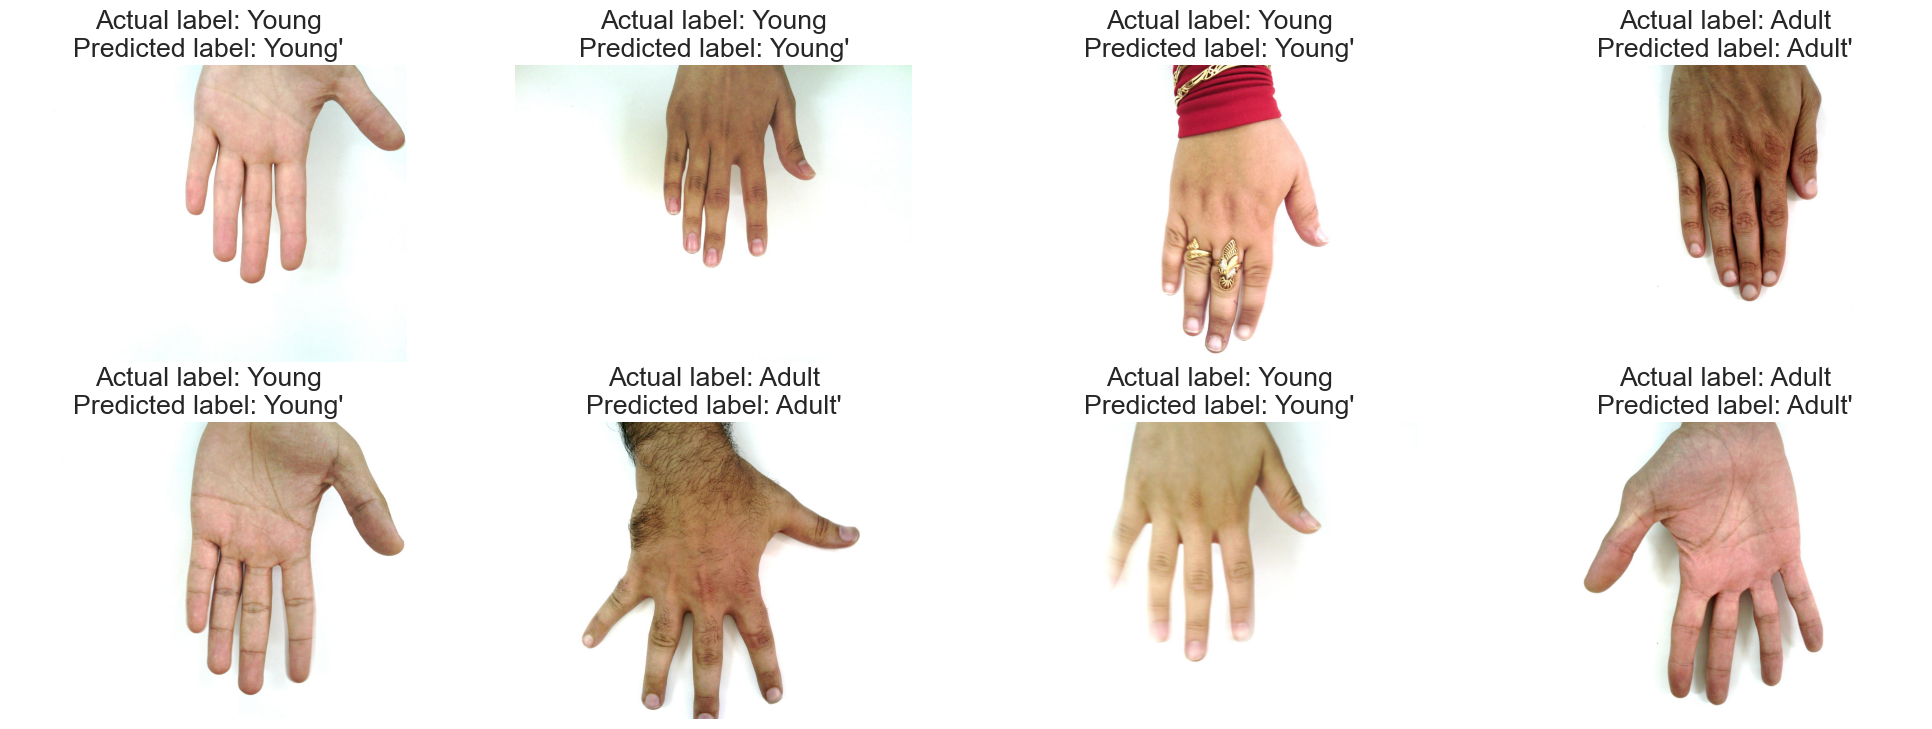

In [40]:
import random

fig = plt.figure(figsize=(25, 8.5))

l = random.sample(range(0,400), 8)

for i in range(1,9):
    n = l[i-1]
    img = x_test[n]
    image = rgb_test_images[n]

    #Extract features and reshape to right dimensions
    input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
    input_img_features=feature_extractor(input_img)
    input_img_features = np.expand_dims(input_img_features, axis=0)
    input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
    #Predict
    img_prediction = lgb_model.predict(input_img_for_RF)
    img_prediction=np.argmax(img_prediction, axis=1)
    img_prediction = str(le.inverse_transform([img_prediction]))  #Reverse the label encoder to original name
    
    
    fig.add_subplot(2,4,i)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f'Actual label: {test_labels[n]}\nPredicted label: {img_prediction[2:-1]}')

